In [96]:
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In [2]:
ds1 = xr.open_dataset("ocean_sfc_u_223x_225x.nc", engine="netcdf4")

In [3]:
ds2 = xr.open_dataset("ocean_sfc_v_223x225x.nc", engine="netcdf4")

In [4]:
ds1

<xarray.Dataset> Size: 162MB
Dimensions:     (Time: 360, bnds: 2, xq: 360, yh: 312)
Coordinates:
  * Time        (Time) datetime64[ns] 3kB 2230-01-31T12:00:00 ... 2259-12-31T...
  * xq          (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh          (yh) float64 2kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Dimensions without coordinates: bnds
Data variables:
    Time_bnds   (Time, bnds) datetime64[ns] 6kB ...
    SSU         (Time, yh, xq) float32 162MB ...
    average_DT  (Time) timedelta64[ns] 3kB ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Mar 04 15:19:41 2024: cdo mergetime ocean_sfc_u_223x_22...
    filename:     22300101.ocean_sfc_u_2230_01.nc
    title:        GOLD_SIS
    grid_type:    regular
    grid_tile:    N/A
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [5]:
ds2

<xarray.Dataset> Size: 162MB
Dimensions:     (Time: 360, bnds: 2, xh: 360, yq: 312)
Coordinates:
  * Time        (Time) datetime64[ns] 3kB 2230-01-31T12:00:00 ... 2259-12-31T...
  * xh          (xh) float64 3kB -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yq          (yq) float64 2kB -89.5 -89.0 -88.5 -87.99 ... 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    Time_bnds   (Time, bnds) datetime64[ns] 6kB ...
    SSV         (Time, yq, xh) float32 162MB ...
    average_DT  (Time) timedelta64[ns] 3kB ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Mar 04 16:06:54 2024: cdo mergetime ocean_sfc_v_223x224...
    filename:     22300101.ocean_sfc_v_2230_01.nc
    title:        GOLD_SIS
    grid_type:    regular
    grid_tile:    N/A
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [6]:
ds1n = ds1.rename({'xq': 'longitude','yh': 'latitude'})
ds2n = ds2.rename({'xh': 'longitude','yq': 'latitude'})

In [7]:
ds1n

<xarray.Dataset> Size: 162MB
Dimensions:     (Time: 360, bnds: 2, longitude: 360, latitude: 312)
Coordinates:
  * Time        (Time) datetime64[ns] 3kB 2230-01-31T12:00:00 ... 2259-12-31T...
  * longitude   (longitude) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * latitude    (latitude) float64 2kB -89.75 -89.25 -88.75 ... 89.25 89.75
Dimensions without coordinates: bnds
Data variables:
    Time_bnds   (Time, bnds) datetime64[ns] 6kB ...
    SSU         (Time, latitude, longitude) float32 162MB ...
    average_DT  (Time) timedelta64[ns] 3kB ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Mar 04 15:19:41 2024: cdo mergetime ocean_sfc_u_223x_22...
    filename:     22300101.ocean_sfc_u_2230_01.nc
    title:        GOLD_SIS
    grid_type:    regular
    grid_tile:    N/A
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [8]:
ds2n

<xarray.Dataset> Size: 162MB
Dimensions:     (Time: 360, bnds: 2, longitude: 360, latitude: 312)
Coordinates:
  * Time        (Time) datetime64[ns] 3kB 2230-01-31T12:00:00 ... 2259-12-31T...
  * longitude   (longitude) float64 3kB -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * latitude    (latitude) float64 2kB -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    Time_bnds   (Time, bnds) datetime64[ns] 6kB ...
    SSV         (Time, latitude, longitude) float32 162MB ...
    average_DT  (Time) timedelta64[ns] 3kB ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Mar 04 16:06:54 2024: cdo mergetime ocean_sfc_v_223x224...
    filename:     22300101.ocean_sfc_v_2230_01.nc
    title:        GOLD_SIS
    grid_type:    regular
    grid_tile:    N/A
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [9]:
ds1n1 = ds1n.drop_vars("Time_bnds")
ds2n1 = ds2n.drop_vars("Time_bnds")

In [10]:
ds1n2 = ds1n1.drop_vars("average_DT")
ds2n2 = ds2n1.drop_vars("average_DT")

In [11]:
ds1n2

<xarray.Dataset> Size: 162MB
Dimensions:    (Time: 360, longitude: 360, latitude: 312)
Coordinates:
  * Time       (Time) datetime64[ns] 3kB 2230-01-31T12:00:00 ... 2259-12-31T1...
  * longitude  (longitude) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * latitude   (latitude) float64 2kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Data variables:
    SSU        (Time, latitude, longitude) float32 162MB ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Mar 04 15:19:41 2024: cdo mergetime ocean_sfc_u_223x_22...
    filename:     22300101.ocean_sfc_u_2230_01.nc
    title:        GOLD_SIS
    grid_type:    regular
    grid_tile:    N/A
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [12]:
ds2n2

<xarray.Dataset> Size: 162MB
Dimensions:    (Time: 360, longitude: 360, latitude: 312)
Coordinates:
  * Time       (Time) datetime64[ns] 3kB 2230-01-31T12:00:00 ... 2259-12-31T1...
  * longitude  (longitude) float64 3kB -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * latitude   (latitude) float64 2kB -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
Data variables:
    SSV        (Time, latitude, longitude) float32 162MB ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Mar 04 16:06:54 2024: cdo mergetime ocean_sfc_v_223x224...
    filename:     22300101.ocean_sfc_v_2230_01.nc
    title:        GOLD_SIS
    grid_type:    regular
    grid_tile:    N/A
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

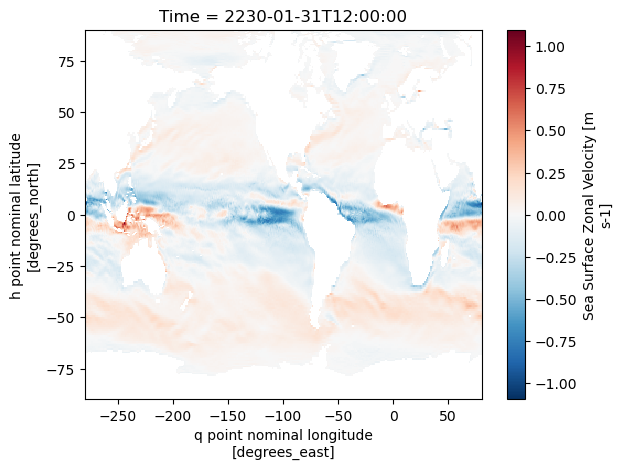

In [13]:
ds1n2["SSU"].isel(Time=0).plot()

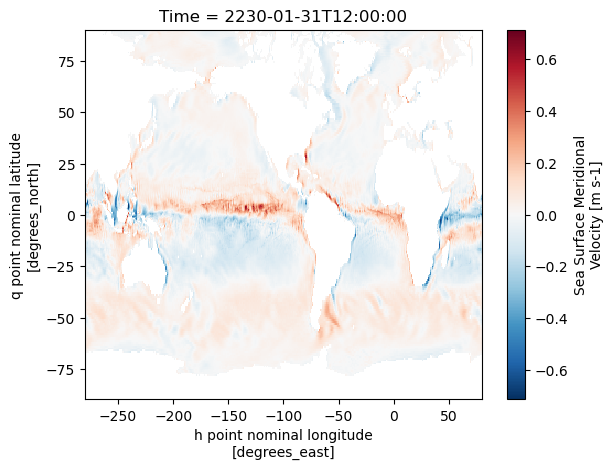

In [14]:
ds2n2["SSV"].isel(Time=0).plot()

In [15]:
ds1n2t1 = ds1n2["SSU"].isel(Time=0)

In [16]:
ds2n2t1 = ds2n2["SSV"].isel(Time=0)

In [17]:
ds1n2t1

<xarray.DataArray 'SSU' (latitude: 312, longitude: 360)> Size: 449kB
[112320 values with dtype=float32]
Coordinates:
    Time       datetime64[ns] 8B 2230-01-31T12:00:00
  * longitude  (longitude) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * latitude   (latitude) float64 2kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Attributes:
    long_name:      Sea Surface Zonal Velocity
    units:          m s-1
    cell_methods:   yh:mean xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

In [18]:
ds2n2t1

<xarray.DataArray 'SSV' (latitude: 312, longitude: 360)> Size: 449kB
[112320 values with dtype=float32]
Coordinates:
    Time       datetime64[ns] 8B 2230-01-31T12:00:00
  * longitude  (longitude) float64 3kB -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * latitude   (latitude) float64 2kB -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
Attributes:
    long_name:      Sea Surface Meridional Velocity
    units:          m s-1
    cell_methods:   yq:point xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

In [19]:
ds1n2.latitude.values

array([-89.75      , -89.24965738, -88.74828786, -88.24520994,
       -87.73974684, -87.2312283 , -86.71899243, -86.20238754,
       -85.6807739 , -85.15352553, -84.62003188, -84.07969952,
       -83.53195377, -82.97624026, -82.41202647, -81.83880316,
       -81.25608582, -80.66341591, -80.06036223, -79.44652199,
       -78.82152199, -78.18501961, -77.53670377, -76.87629576,
       -76.20355001, -75.51825477, -74.82023269, -74.10934131,
       -73.38547342, -72.64855741, -71.89855741, -71.13547342,
       -70.35934131, -69.57023269, -68.76825477, -67.95355001,
       -67.12629576, -66.28670377, -65.43501961, -64.57152199,
       -63.69652199, -62.81036223, -61.91341591, -61.00608582,
       -60.08880316, -59.16202647, -58.22624026, -57.28195377,
       -56.32969952, -55.37003188, -54.40352553, -53.4307739 ,
       -52.45238754, -51.46899243, -50.4812283 , -49.48974684,
       -48.49520994, -47.49828786, -46.49965738, -45.5       ,
       -44.5       , -43.50058994, -42.50294787, -41.50

In [20]:
ds2n2.latitude.values

array([-8.94998287e+01, -8.89989726e+01, -8.84967489e+01, -8.79924784e+01,
       -8.74854876e+01, -8.69751104e+01, -8.64606900e+01, -8.59415807e+01,
       -8.54171497e+01, -8.48867787e+01, -8.43498657e+01, -8.38058266e+01,
       -8.32540970e+01, -8.26941334e+01, -8.21254148e+01, -8.15474445e+01,
       -8.09597509e+01, -8.03618891e+01, -7.97534421e+01, -7.91340220e+01,
       -7.85032708e+01, -7.78608617e+01, -7.72064998e+01, -7.65399229e+01,
       -7.58609024e+01, -7.51692437e+01, -7.44647870e+01, -7.37474074e+01,
       -7.30170154e+01, -7.22735574e+01, -7.15170154e+01, -7.07474074e+01,
       -6.99647870e+01, -6.91692437e+01, -6.83609024e+01, -6.75399229e+01,
       -6.67064998e+01, -6.58608617e+01, -6.50032708e+01, -6.41340220e+01,
       -6.32534421e+01, -6.23618891e+01, -6.14597509e+01, -6.05474445e+01,
       -5.96254148e+01, -5.86941334e+01, -5.77540970e+01, -5.68058266e+01,
       -5.58498657e+01, -5.48867787e+01, -5.39171497e+01, -5.29415807e+01,
       -5.19606900e+01, -

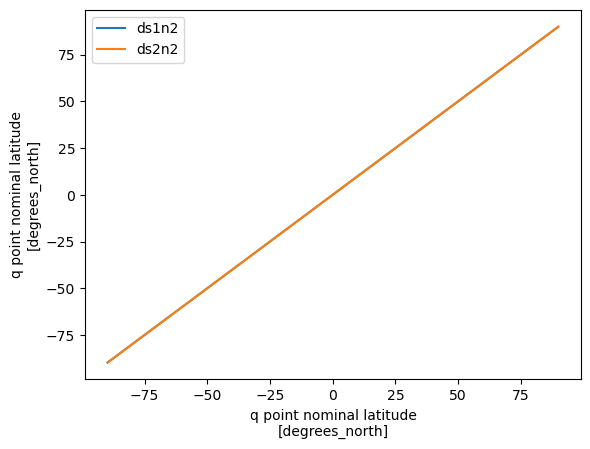

In [21]:
ds1n2.latitude.plot(label="ds1n2")
ds2n2.latitude.plot(label="ds2n2")
plt.legend()

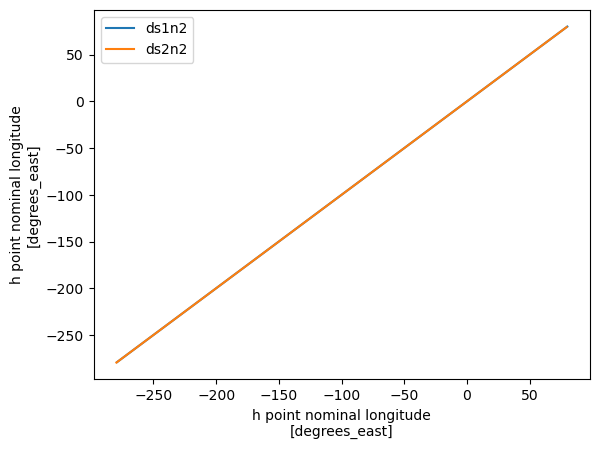

In [22]:
ds1n2.longitude.plot(label="ds1n2")
ds2n2.longitude.plot(label="ds2n2")
plt.legend()

In [23]:
ds2n2t1_reindexed = ds2n2t1.reindex_like(ds1n2t1)

In [24]:
ds1n2t1_reindexed = ds1n2t1.reindex_like(ds2n2t1)

In [25]:
ds2n2t1_reindexed

<xarray.DataArray 'SSV' (latitude: 312, longitude: 360)> Size: 449kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * latitude   (latitude) float64 2kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    Time       datetime64[ns] 8B 2230-01-31T12:00:00
Attributes:
    long_name:      Sea Surface Meridional Velocity
    units:          m s-1
    cell_methods:   yq:point xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

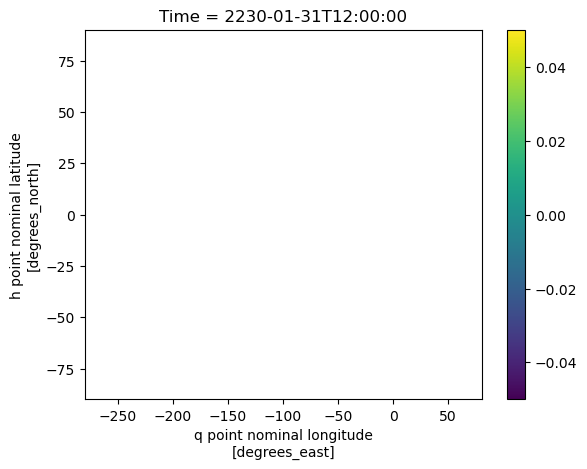

In [26]:
(ds1n2t1 - ds2n2t1_reindexed).plot()

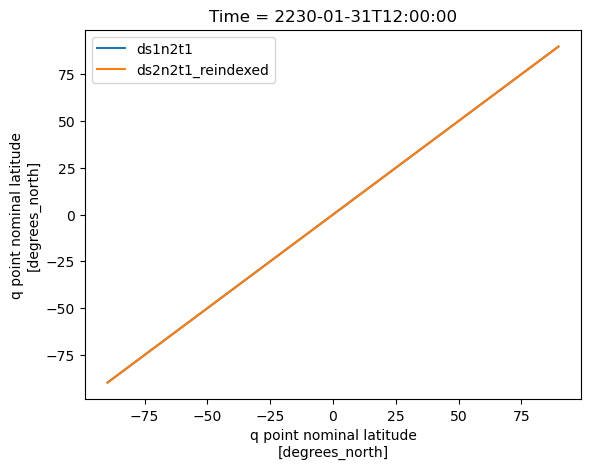

In [27]:
ds1n2t1.latitude.plot(label="ds1n2t1")
ds2n2t1_reindexed.latitude.plot(label="ds2n2t1_reindexed")
plt.legend()

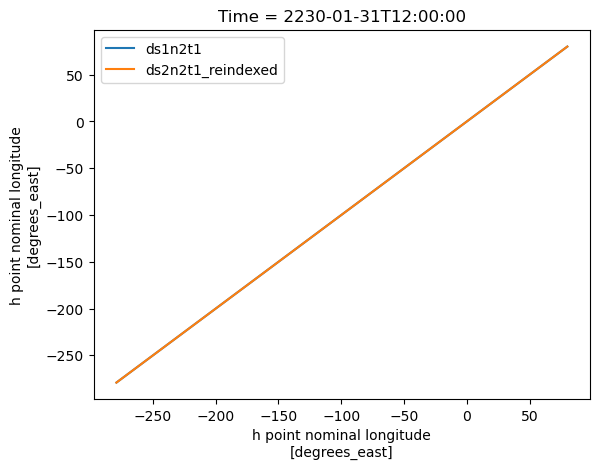

In [28]:
ds1n2t1.longitude.plot(label="ds1n2t1")
ds2n2t1_reindexed.longitude.plot(label="ds2n2t1_reindexed")
plt.legend()

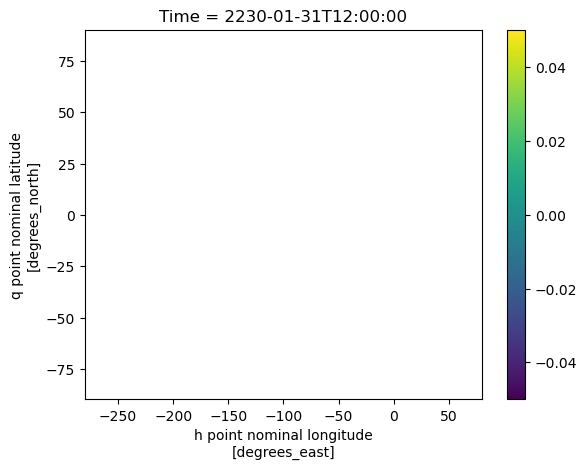

In [29]:
(ds2n2t1 - ds1n2t1_reindexed).plot()

In [34]:
ds1n2t1

<xarray.DataArray 'SSU' (latitude: 312, longitude: 360)> Size: 449kB
[112320 values with dtype=float32]
Coordinates:
    Time       datetime64[ns] 8B 2230-01-31T12:00:00
  * longitude  (longitude) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * latitude   (latitude) float64 2kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Attributes:
    long_name:      Sea Surface Zonal Velocity
    units:          m s-1
    cell_methods:   yh:mean xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

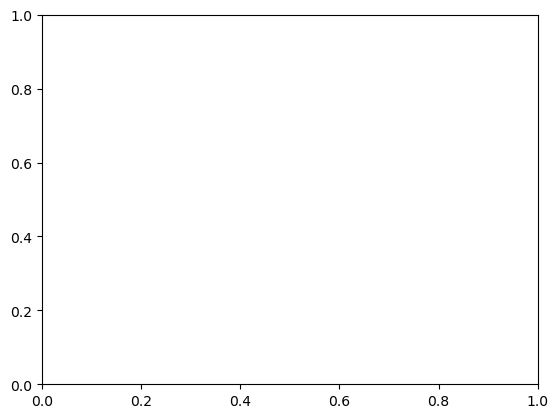

In [38]:
#quiver([X, Y], U, V, [C], **kwargs)
plt.quiver([ds1n2t1.longitude, ds1n2t1.latitude], ds1n2t1, ds2n2t1)#, angles='xy', scale_units='xy', scale=0.1, color='blue')

In [42]:
ds1n2t1.max()

<xarray.DataArray 'SSU' ()> Size: 4B
array(1.0979452, dtype=float32)
Coordinates:
    Time     datetime64[ns] 8B 2230-01-31T12:00:00

In [43]:
ds1n2t1.min()

<xarray.DataArray 'SSU' ()> Size: 4B
array(-1.0467263, dtype=float32)
Coordinates:
    Time     datetime64[ns] 8B 2230-01-31T12:00:00

In [44]:
ds2n2t1.max()

<xarray.DataArray 'SSV' ()> Size: 4B
array(0.6397104, dtype=float32)
Coordinates:
    Time     datetime64[ns] 8B 2230-01-31T12:00:00

In [45]:
ds2n2t1.min()

<xarray.DataArray 'SSV' ()> Size: 4B
array(-0.71295965, dtype=float32)
Coordinates:
    Time     datetime64[ns] 8B 2230-01-31T12:00:00

In [48]:
ds2n2t1.longitude.data

array([-279.5, -278.5, -277.5, -276.5, -275.5, -274.5, -273.5, -272.5,
       -271.5, -270.5, -269.5, -268.5, -267.5, -266.5, -265.5, -264.5,
       -263.5, -262.5, -261.5, -260.5, -259.5, -258.5, -257.5, -256.5,
       -255.5, -254.5, -253.5, -252.5, -251.5, -250.5, -249.5, -248.5,
       -247.5, -246.5, -245.5, -244.5, -243.5, -242.5, -241.5, -240.5,
       -239.5, -238.5, -237.5, -236.5, -235.5, -234.5, -233.5, -232.5,
       -231.5, -230.5, -229.5, -228.5, -227.5, -226.5, -225.5, -224.5,
       -223.5, -222.5, -221.5, -220.5, -219.5, -218.5, -217.5, -216.5,
       -215.5, -214.5, -213.5, -212.5, -211.5, -210.5, -209.5, -208.5,
       -207.5, -206.5, -205.5, -204.5, -203.5, -202.5, -201.5, -200.5,
       -199.5, -198.5, -197.5, -196.5, -195.5, -194.5, -193.5, -192.5,
       -191.5, -190.5, -189.5, -188.5, -187.5, -186.5, -185.5, -184.5,
       -183.5, -182.5, -181.5, -180.5, -179.5, -178.5, -177.5, -176.5,
       -175.5, -174.5, -173.5, -172.5, -171.5, -170.5, -169.5, -168.5,
      

In [52]:
ds = xr.Dataset(
    data_vars=dict(
        SSU=(["longitude", "latitude"], ds2n2t1.data),
    ),
)

In [53]:
ds

<xarray.Dataset> Size: 449kB
Dimensions:  (longitude: 312, latitude: 360)
Dimensions without coordinates: longitude, latitude
Data variables:
    SSU      (longitude, latitude) float32 449kB nan nan nan nan ... nan nan nan

In [59]:
dataset1 = xr.Dataset(
    {
        'ssu': (['lat', 'lon'], ds2n2t1.data),
    },
    coords={
        'lat': ds2n2t1.latitude.data,  # Coordenadas de latitude
        'lon': ds2n2t1.longitude.data   # Coordenadas de longitude
    }
)

In [60]:
dataset1

<xarray.Dataset> Size: 455kB
Dimensions:  (lat: 312, lon: 360)
Coordinates:
  * lat      (lat) float64 2kB -89.5 -89.0 -88.5 -87.99 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 3kB -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
Data variables:
    ssu      (lat, lon) float32 449kB nan nan nan nan nan ... nan nan nan nan

In [61]:
dataset2 = xr.Dataset(
    {
        'ssv': (['lat', 'lon'], ds1n2t1.data),
    },
    coords={
        'lat': ds2n2t1.latitude.data,  # Coordenadas de latitude
        'lon': ds2n2t1.longitude.data   # Coordenadas de longitude
    }
)

In [62]:
dataset1

<xarray.Dataset> Size: 455kB
Dimensions:  (lat: 312, lon: 360)
Coordinates:
  * lat      (lat) float64 2kB -89.5 -89.0 -88.5 -87.99 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 3kB -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
Data variables:
    ssu      (lat, lon) float32 449kB nan nan nan nan nan ... nan nan nan nan

In [70]:
dd=(dataset1.ssu-dataset2.ssv)

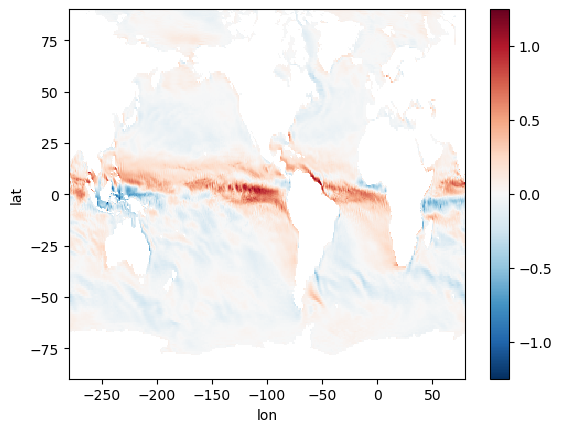

In [71]:
dd.plot()

Text(0, 0.5, 'Latitude')

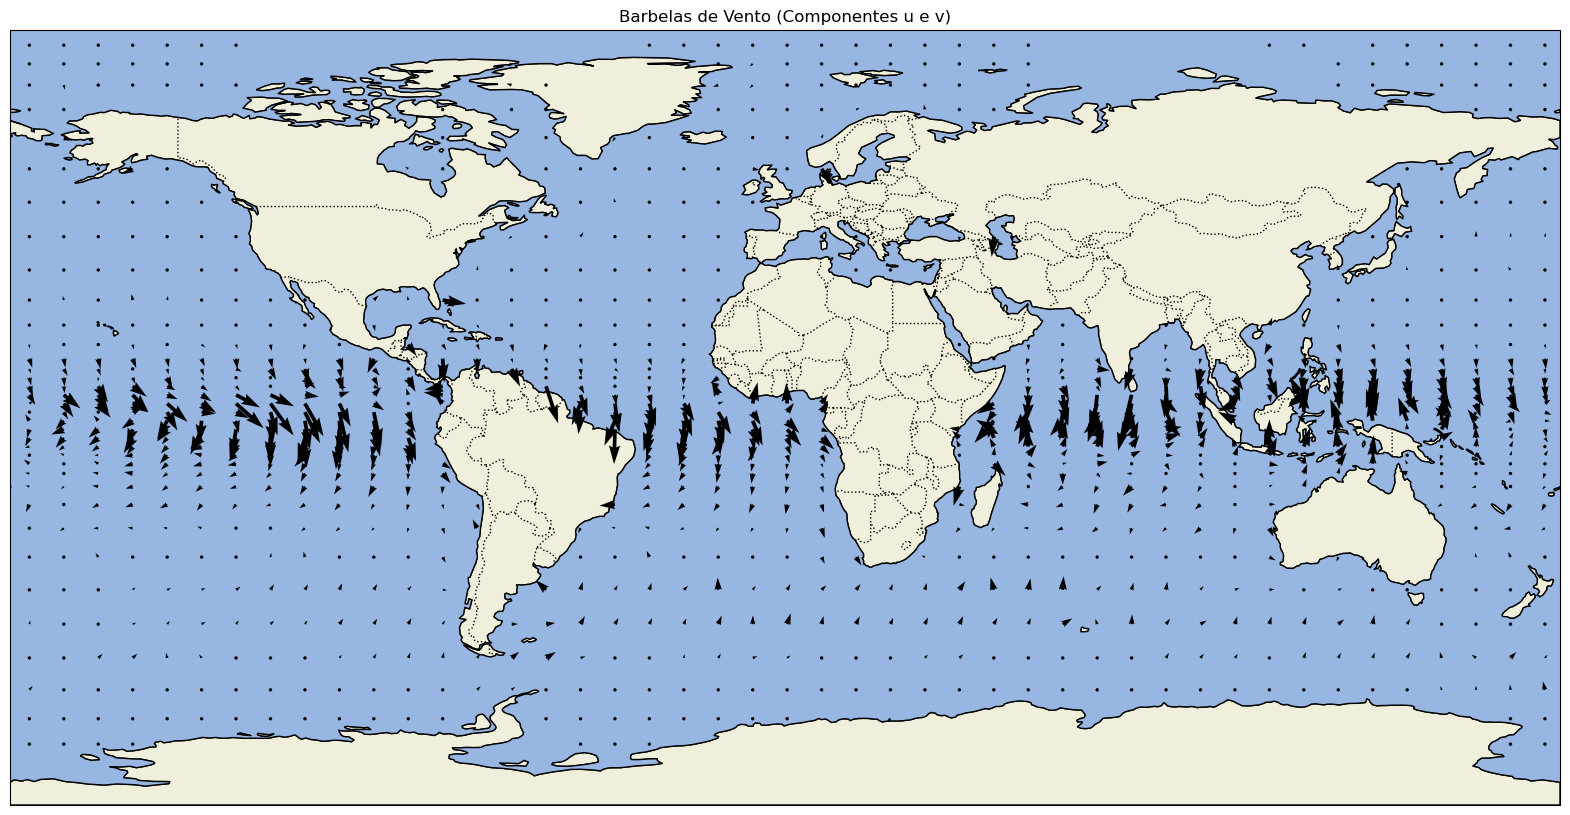

In [114]:
skip = 8
dataset1_sparce = dataset1.isel(lat=slice(None, None, skip), lon=slice(None, None, skip))
dataset2_sparce = dataset2.isel(lat=slice(None, None, skip), lon=slice(None, None, skip))

fig = plt.figure(figsize=(20, 16))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN)

plt.quiver(dataset1_sparce["lon"], dataset1_sparce["lat"], 
           dataset1_sparce["ssu"], dataset2_sparce["ssv"], 
           angles="xy", 
           scale_units="xy", 
           scale=0.08, 
           color="black", transform=ccrs.PlateCarree())

plt.title("Barbelas de Vento (Componentes u e v)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Ajustar os limites do gráfico
#plt.xlim(dataset1["lon"].min(), dataset1["lon"].max())
#plt.ylim(dataset1["lat"].min(), dataset1["lat"].max())

In [115]:
ds1n2t1.data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [116]:
ds1n2t1.longitude.data

array([-279., -278., -277., -276., -275., -274., -273., -272., -271.,
       -270., -269., -268., -267., -266., -265., -264., -263., -262.,
       -261., -260., -259., -258., -257., -256., -255., -254., -253.,
       -252., -251., -250., -249., -248., -247., -246., -245., -244.,
       -243., -242., -241., -240., -239., -238., -237., -236., -235.,
       -234., -233., -232., -231., -230., -229., -228., -227., -226.,
       -225., -224., -223., -222., -221., -220., -219., -218., -217.,
       -216., -215., -214., -213., -212., -211., -210., -209., -208.,
       -207., -206., -205., -204., -203., -202., -201., -200., -199.,
       -198., -197., -196., -195., -194., -193., -192., -191., -190.,
       -189., -188., -187., -186., -185., -184., -183., -182., -181.,
       -180., -179., -178., -177., -176., -175., -174., -173., -172.,
       -171., -170., -169., -168., -167., -166., -165., -164., -163.,
       -162., -161., -160., -159., -158., -157., -156., -155., -154.,
       -153., -152.,